In [16]:
import pandas as pd

# Data Handling 

In [17]:
# Directly import a tar file , decompress and extract contents into a dataframe
import tarfile
import pandas as pd
with tarfile.open("ratings_Electronics_Ver3.tar-1", "r:*") as tar:
    csv_path = tar.getnames()[0]
    df = pd.read_csv(tar.extractfile(csv_path), header = None, sep=",")

In [18]:
df.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [19]:
df.columns = ["userid", "productid", "rating", "timestamp"]
df.drop("timestamp", axis = 1, inplace = True)
print(df.shape)
df.info()

(7824482, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userid       object
productid    object
rating       float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [21]:
# find no. of unique products and users each in the data set
print("Total number of users: ", df['userid'].nunique() ,"Total number of products: ", df['productid'].nunique())

Total number of users:  4201696 Total number of products:  476002


In [22]:
# Check whether any user - product records with missing ratings
print(df[df['rating'] == 0]) # none found, lets proceed with EDA

Empty DataFrame
Columns: [userid, productid, rating]
Index: []


# EDA

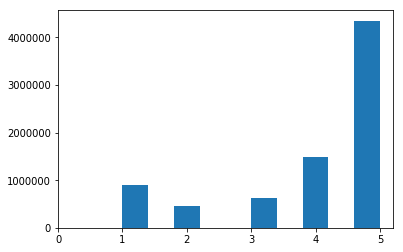

In [25]:
# plotting histogram to understand the users distribution of ratings for products in the dataset

%matplotlib inline
import matplotlib.pyplot as plt
ratings = df['rating']

plt.hist([ratings])
plt.xticks(range(0, 6))

plt.show()

In [26]:
# Maximum user ratings are 5 followed by 4. 
# the dataset leaning largely towards  products with higher ratings. 
# Should check once on this with the company to make sure data provide is correct, and no products left out.

# Product Popularity Table[ by rating scale, no of ratings]

In [27]:
# analysis by products - find the mean ratings of the products, the no. of ratings providing and sort by ascending ratings
# this will give a product wise popularity table with product mean ratings and count of ratings received
# In cold start, recommendation of popularly rated and/or highly rated items irrespective of content/ user similarity can be provided by this table.

In [28]:
df.groupby('productid')['rating'].mean().sort_values(ascending=False).head()  # finding mean ratings of products and sorting

productid
BT008V9J9U    5.0
B0058PPK8Y    5.0
B0058OQ9Q2    5.0
B0058OKSMS    5.0
B0058OHGX2    5.0
Name: rating, dtype: float64

In [29]:
df.groupby('productid')['rating'].count().sort_values(ascending=False).head() # finding count of ratings and sorting to see

productid
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: rating, dtype: int64

In [30]:
# lets build a popularity recommendation table with product mean ratings and count of ratings received
#Then we can recommend items which a popularly rated and/ or highly rated.

In [31]:
Pop_r_df = pd.DataFrame(df.groupby('productid')['rating'].mean())
Pop_r_df['rating_counts'] = pd.DataFrame(df.groupby('productid')['rating'].count())
Pop_r_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 476002 entries, 0132793040 to BT008V9J9U
Data columns (total 2 columns):
rating           476002 non-null float64
rating_counts    476002 non-null int64
dtypes: float64(1), int64(1)
memory usage: 10.9+ MB


In [80]:
# rating and rating_counts in  descending order
Popularity_top10_df = Pop_r_df.sort_values(['rating', 'rating_counts'], ascending=[False, False])[:10]

In [77]:
Pop_r_df.head() 

,rating,rating_counts
productid,,
0132793040,5.000000,1
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27


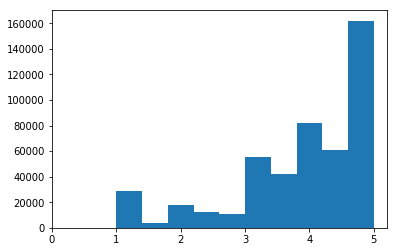

In [35]:
plt.hist([Pop_r_df['rating']]) # plotting product wise mean ratings
plt.xticks(range(0, 6))

plt.show()

In [ ]:
# We can see that no. of product wise low ratings reduce ; and there is a predominance of higher rated products in dataset

# To reduce the dimensionality of the dataset, we will filter out rarely rated products and rarely rating users.

In [41]:
user_counts = df['userid'].value_counts() 

In [42]:
user_counts # no. product ratings provided per user

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A12DQZKRKTNF5E    252
A231WM2Z2JL0U3    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A1T1YSCDW0PD25    227
                 ... 
ARBDIT1T7J6F3       1
A4B0S53W3XTNK       1
A1D8ABQO0NVTEI      1
AQHKNXP0C7Z3T       1
A1C9OBGSK8J02P      1
A3PUWC4Q4C8OAK      1
A254PEDZTILCKG      1
AEUFH9DQJKX16       1
A349O62FQN7MIT      1
A3AHXP1US1XC9R      1
ASRQ9FC5DU4G2       1
A211CLGP7K51IL      1
A3DOQG7FAJ1UQP      1
AXOOCFPI27YRE       1
AXVQ6D48VG

Consider users who have only rated atleast 50 products in the dataset to create a "denser" dataset, also include products which are rated ateast more than once only.

In [46]:
# step 1: eliminating users with < 50 ratings
denser_df = df[df['userid'].isin(user_counts[user_counts > 50].index)]
print("records after removing users with below 50 ratings: ", denser_df.count())
print("new no. of unique users: ", denser_df['userid'].nunique())
print("new no. of products: ", denser_df['productid'].nunique() )

records after removing users with below 50 ratings:  userid       122171
productid    122171
rating       122171
dtype: int64
new no. of unique users:  1466
new no. of products:  47155


In [47]:
#step 2: eliminating  products with less than 1 rating
Pop_r_denser_df = pd.DataFrame(denser_df.groupby('productid')['rating'].mean())
Pop_r_denser_df['rating_counts'] = pd.DataFrame(denser_df.groupby('productid')['rating'].count())
Pop_r_V_denser_df = Pop_r_denser_df[Pop_r_denser_df['rating_counts']>1]
V_denser_df = denser_df[denser_df['productid'].isin(Pop_r_V_denser_df.index)]
V_denser_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91947 entries, 177 to 7824438
Data columns (total 3 columns):
userid       91947 non-null object
productid    91947 non-null object
rating       91947 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.8+ MB


In [48]:
print("records after removing products rated less than once: ", V_denser_df.count())
print("new no. of unique users: ", V_denser_df['userid'].nunique())
print("new no. of products: ", V_denser_df['productid'].nunique() )

records after removing products rated less than once:  userid       91947
productid    91947
rating       91947
dtype: int64
new no. of unique users:  1466
new no. of products:  16931


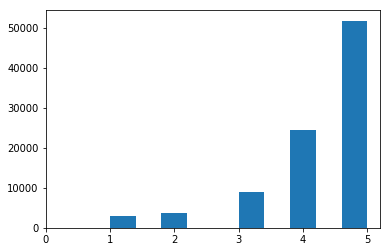

In [49]:
# review the distribution to see if it has changed from original

d_ratings = V_denser_df['rating']

plt.hist([d_ratings])
plt.xticks(range(0, 6))

plt.show() # Conclusion: no of  products with high ratings comparison remains more or less similar to full data set.


In [50]:
V_denser_df.head()

,userid,productid,rating
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0
1138,A25RTRAPQAJBDJ,0972683275,5.0


In [52]:
print('The original data frame shape:\t{}'.format(df.shape))
print('The new data frame shape:\t{}'.format(V_denser_df.shape))

The original data frame shape:	(7824482, 3)
The new data frame shape:	(91947, 3)


# Convert dataframe to Surprise format & Split into Train and test data set [ 70:30]

# Surprise
To load a dataset from a pandas dataframe, we will use the load_from_df() method, we will also need a Reader object, and the rating_scale parameter must be specified. The dataframe must have three columns, corresponding to the user ids, the prod ids, and the ratings in this order. Each row thus corresponds to a given rating.

In [53]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [69]:
reader = Reader(rating_scale=(1, 5)) # can be skipped as this is the default rating scale
pdata = Dataset.load_from_df(V_denser_df[['userid', 'productid', 'rating']], reader)

trainset, testset = train_test_split(pdata, test_size=0.30)

In [70]:
pdata

# Collaborative Filtering using Surprise SVD

In [71]:
# since this is computationally expensive we will start from denser_df[ users who rated 50 products or more]

In [72]:
algo = SVD()
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 0.9444


0.944416128583826

In [73]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [74]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,A2TA40MV2H4O6F,B007XOQ3BQ,5.0,4.414350,{'was_impossible': False},39,4,0.585650
1,A2NX6PABLIJLP1,B0007RV3IE,5.0,4.311129,{'was_impossible': False},36,3,0.688871
2,A18A5VSD0IPN14,B003Y34AK6,3.0,4.658294,{'was_impossible': False},29,1,1.658294
3,A2BCDZO1XQLDH,B00HQ883T4,1.0,3.858107,{'was_impossible': False},30,1,2.858107
4,A33YZNZIRA3H97,B00004TX77,5.0,4.102362,{'was_impossible': False},78,1,0.897638


In [64]:

best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [65]:
best_predictions # top ten predictions

,uid,iid,rui,est,details,Iu,Ui,err
17370,A3REK3OFONWB1Q,B00834SJNA,5.0,5.0,{'was_impossible': False},56,64,0.0
13626,A3RGJ1FXOB1ZLL,B0036Q7MV0,5.0,5.0,{'was_impossible': False},42,25,0.0
13625,A2QI2JHSIQ3SN3,B0019EHU8G,5.0,5.0,{'was_impossible': False},28,67,0.0
15720,A12EVK82QUTSA6,B003ES5ZUU,5.0,5.0,{'was_impossible': False},39,129,0.0
13616,A1TQBAHI3M4ZBQ,B002V88HFE,5.0,5.0,{'was_impossible': False},32,68,0.0
17710,A3D0UM4ZD2CMAW,B003ZM7YTA,5.0,5.0,{'was_impossible': False},52,5,0.0
11291,A1PV5T5S4D5NPI,B000KKPN5C,5.0,5.0,{'was_impossible': False},45,7,0.0
5677,A680RUE1FDO8B,B00HMREOLK,5.0,5.0,{'was_impossible': False},223,13,0.0
15726,A2HMF8ZR67BNZS,B002WE4HE2,5.0,5.0,{'was_impossible': False},74,36,0.0
7617,A18U49406IPPIJ,B000CKVOOY,5.0,5.0,{'was_impossible': False},47,24,0.0


In [66]:
worst_predictions # worst ten predictions

,uid,iid,rui,est,details,Iu,Ui,err
13671,A3TA1UJWRJF9NC,B000MX48VM,1.0,4.897757,{'was_impossible': False},29,28,3.897757
1674,A1ZBEIL78MLR9Z,B00D856NOG,1.0,4.922797,{'was_impossible': False},34,12,3.922797
23720,A6KL17KKN0A5L,B000JE7GPY,1.0,4.934786,{'was_impossible': False},25,36,3.934786
835,A1V4VVBQBFXRHC,B003ZBZ64Q,1.0,4.961943,{'was_impossible': False},63,14,3.961943
19127,A11EYMH9UV9XG7,B00D1GYNT4,1.0,4.972377,{'was_impossible': False},42,20,3.972377
10811,A1KY5G5FP31F2F,B007PTCFFW,1.0,4.978442,{'was_impossible': False},37,28,3.978442
17341,A35KBAQ4VBNQ6L,B00BGGDVOO,1.0,4.980448,{'was_impossible': False},31,42,3.980448
14218,A1H55L0BLPCWYF,B0002L5R78,1.0,5.000000,{'was_impossible': False},24,35,4.000000
21205,A2PICNZWHEINQC,B002RM08RE,1.0,5.000000,{'was_impossible': False},32,18,4.000000
20281,AK3GKIV8DEY8B,B001542X64,1.0,5.000000,{'was_impossible': False},41,6,4.000000


# Popularity  model 
This is  independent of user similarity, here we  will present the same list to all users
Mostly we assume these are users with a cold start visiting first time or with on history on the product site

In [81]:
Popularity_top10_df # list of most popular 10 items

,rating,rating_counts
productid,,
B008I64AQ8,5.0,45
B00GQDCMVA,5.0,41
B007WMOCW6,5.0,38
B002T3JN0Y,5.0,36
B00592002W,5.0,36
B00DWLPUZY,5.0,34
B00KC7I2GU,5.0,31
B00009R8ZW,5.0,28
B000FIJA6W,5.0,28


# Summarization of findings

1. Summarized the data based on the no. of users, products and review the rating trends.
2. The good thing in the dataset is that there were no null values, all records had ratings
3. Created a popularity recommendation table basis highest ratings with highest frequecy of being rated. This is idependent of user  and/ or item similarity. We could do this on full data set
4. For the computationally intensive matrix factorization based SVD algo we removed the users with less that 50 products rated: and the  products w th only one rating.
5. convert the datset into Surpise lib format and split that dats for train-test.
6. ran the SDV algo from surprise , obtained the rmse and studied the best and worse predictions  after trainng on the test set.
7. the list of top 10 predictions for products for  both popularity  based and factorization based methods in lsited above.
8. for a new user we  can recommend the most poplar trending products, once a user has started rating some items
9. we can then graduacte to recommendations using the SDV model.

# scipy SDVS implementation - just to try

In [144]:
 #Generating ratings matrix from explicit ratings
 ratings_matrix = V_denser_df.pivot(index ='userid',columns ='productid',values ='rating')
 userid = V_denser_df.index
 productid = V_denser_df.columns
 print(ratings_matrix.shape)
 ratings_matrix.head()

(1466, 16931)


productid,0970407998,0972683275,1400501466,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,787988002X,...,B00KYMCJF8,B00L1I80K2,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L3YHF6O,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8
userid,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100WO06OQR8BQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105S56ODHGJEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105TOJ6LTVMBG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10AFVU66A79Y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
#ratings_matrix_1 = ratings_matrix.iloc[:, :-22000]

In [146]:
#ratings_matrix_1.shape

In [147]:
ratings_matrix.fillna(0, inplace = True)

In [148]:
 ratings_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1466 entries, A100UD67AHFODS to AZOK5STV85FBJ
Columns: 16931 entries, 0970407998 to B00LI4ZZO8
dtypes: float64(16931)
memory usage: 189.4+ MB


In [149]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ratings_matrix, k = 50)

In [150]:
sigma

array([ 60.13061499,  60.34949267,  60.59702138,  60.78008451,
        60.97766603,  61.24204755,  61.37279726,  61.80856137,
        61.86491769,  62.12771735,  62.42827307,  62.58804782,
        62.96581963,  63.41612666,  63.55662795,  64.02386887,
        64.13062772,  64.44699867,  64.67223347,  65.13040825,
        65.47922693,  65.60415119,  66.1040875 ,  66.58038997,
        66.9622794 ,  67.55314911,  67.96004071,  68.40646877,
        68.74587672,  69.37848204,  69.82724727,  70.43343816,
        70.67652398,  71.25435523,  71.87268916,  72.15130386,
        72.71428785,  73.39620545,  75.30230095,  76.70166246,
        77.63844932,  79.57392693,  81.95169987,  82.5808894 ,
        83.87227005,  87.75342157,  91.82485959, 104.1248037 ,
       116.79609688, 180.02600353])